In [1]:
import cs7641assn4 as a4
import numpy as np
import pandas as pd
import warnings

pd.set_option('display.max_columns', 35)
# pd.reset_option("display.max_columns")

In [2]:
full_results = pd.read_hdf('data.h5', key='dataset', mode='a')

In [3]:
full_results

,rH,rG,rF,size,p,desc,map_name,is_slippery,epsilon,gamma,max_iter,qepsilon,lr,qgamma,episodes,initial,env_desc,env_rs,pi_time,pi_V,pi_epochs,pi_policy,pi_policy_arrows,vi_time,vi_V,vi_epochs,vi_policy,vi_policy_arrows,Q_time,Q,Q_V,Q_policy,Q_policy_arrows
0,-1,1,-0.2,4,0.8,None,4x4,False,1.000000e-08,0.8,10000,0.1,0.8,0.95,10000,1,"[[S, F, F, F], [F, H, F, H], [F, F, F, H], [H,...","[-0.2, -0.2, -0.2, -0.2, -0.2, -1.0, -0.2, -1....",0.001161,"[0.9660800000000008, 1.457600000000001, 2.0720...",7,"[1, 2, 1, 0, 1, 0, 1, 0, 2, 1, 1, 0, 0, 2, 2, 0]","[[↓, →, ↓, ←], [↓, ←, ↓, ←], [→, ↓, ↓, ←], [←,...",0.008001,"[0.9660799905143127, 1.4575999905143127, 2.071...",91,"[1, 2, 1, 0, 1, 0, 1, 0, 2, 1, 1, 0, 0, 2, 2, 0]","[[↓, →, ↓, ←], [↓, ←, ↓, ←], [→, ↓, ↓, ←], [←,...",1.619264,"[[0.37379674921874956, 0.6039965781249996, 0.6...","[0.6039965781249996, 0.8463121874999997, 1.101...","[1, 2, 1, 0, 1, 0, 1, 0, 2, 1, 1, 0, 0, 2, 2, 0]","[[↓, →, ↓, ←], [↓, ←, ↓, ←], [→, ↓, ↓, ←], [←,..."
1,-1,1,-0.2,8,0.8,None,8x8,False,1.000000e-08,0.8,10000,0.1,0.8,0.95,10000,1,"[[S, F, F, F, F, F, F, F], [F, F, F, F, F, F, ...","[-0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0....",0.008319,"[-0.6701465116672001, -0.5876831395840001, -0....",13,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, ...","[[↓, ↓, ↓, ↓, ↓, ↓, ↓, ↓], [↓, →, ↓, →, ↓, ↓, ...",0.032797,"[-0.6701465165238721, -0.587683144440672, -0.4...",94,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, ...","[[↓, ↓, ↓, ↓, ↓, ↓, ↓, ↓], [↓, ↓, ↓, →, ↓, ↓, ...",3.948933,"[[-1.0983338742625979, -0.9456146044869451, -0...","[-0.9456146044869451, -0.7848574784073106, -0....","[1, 1, 2, 1, 2, 1, 1, 0, 1, 1, 2, 2, 1, 1, 2, ...","[[↓, ↓, →, ↓, →, ↓, ↓, ←], [↓, ↓, →, →, ↓, ↓, ..."
2,-1,1,-0.2,4,0.8,None,4x4,True,1.000000e-08,0.8,10000,0.1,0.8,0.95,10000,1,"[[S, F, F, F], [F, H, F, H], [F, F, F, H], [H,...","[-0.2, -0.2, -0.2, -0.2, -0.2, -1.0, -0.2, -1....",0.000694,"[-0.925710165014909, -0.9675729521710873, -0.9...",4,"[0, 3, 3, 3, 0, 0, 0, 0, 3, 1, 0, 0, 0, 2, 1, 0]","[[←, ↑, ↑, ↑], [←, ←, ←, ←], [↑, ↓, ←, ←], [←,...",0.007028,"[-0.9257101677274406, -0.9675729537982982, -0....",89,"[0, 3, 3, 3, 0, 0, 0, 0, 3, 1, 0, 0, 0, 2, 1, 0]","[[←, ↑, ↑, ↑], [←, ←, ←, ←], [↑, ↓, ←, ←], [←,...",1.484242,"[[-2.412922260811493, -2.211129810113885, -2.3...","[-2.211129810113885, -2.0260349734160794, -2.1...","[1, 0, 2, 0, 2, 0, 1, 0, 1, 2, 3, 0, 0, 1, 2, 0]","[[↓, ←, →, ←], [→, ←, ↓, ←], [↓, →, ↑, ←], [←,..."
3,-1,1,-0.2,8,0.8,None,8x8,True,1.000000e-08,0.8,10000,0.1,0.8,0.95,10000,1,"[[S, F, F, F, F, F, F, F], [F, F, F, F, F, F, ...","[-0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0....",0.006229,"[-0.9992295366480467, -0.9986516891340815, -0....",7,"[3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 2, ...","[[↑, →, →, →, →, →, →, →], [↑, ↑, ↑, ↑, ↑, ↑, ...",0.028723,"[-0.999229537127132, -0.9986516896132036, -0.9...",91,"[3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 2, ...","[[↑, →, →, →, →, →, →, →], [↑, ↑, ↑, ↑, ↑, ↑, ...",5.524295,"[[-3.092363894051347, -3.06339133380597, -2.74...","[-2.7458258330363328, -2.737544989590017, -2.8...","[2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 3, 1, 1, ...","[[→, →, ↓, ↓, ↓, ↓, →, ↓], [↓, →, →, →, ↑, ↓, ..."
4,-1,1,-0.2,4,0.8,None,4x4,False,1.000000e-08,0.8,10000,0.1,0.8,0.95,10000,0,"[[S, F, F, F], [F, H, F, H], [F, F, F, H], [H,...","[-0.2, -0.2, -0.2, -0.2, -0.2, -1.0, -0.2, -1....",0.001062,"[0.9660800000000008, 1.457600000000001, 2.0720...",7,"[1, 2, 1, 0, 1, 0, 1, 0, 2, 1, 1, 0, 0, 2, 2, 0]","[[↓, →, ↓, ←], [↓, ←, ↓, ←], [→, ↓, ↓, ←], [←,...",0.007250,"[0.9660799905143127, 1.4575999905143127, 2.071...",91,"[1, 2, 1, 0, 1, 0, 1, 0, 2, 1, 1, 0, 0, 2, 2, 0]","[[↓, →, ↓, ←], [↓, ←, ↓, ←], [→, ↓, ↓, ←], [←,...",1.608711,"[[0.37379674921874956, 0.6039965781249996, 0.6...","[0.6039965781249996, 0.8463121874999997, 1.101...","[1, 2, 1, 0, 1, 0, 1, 0, 2, 1, 1, 0, 0, 2, 2, 0]","[[↓, →, ↓, ←], [↓, ←, ↓, ←], [→, ↓, ↓, ←], [←,..."
5,-1,1,-0.2,8,0.8,None,8x8,False,1.000000e-08,0.8,10000,0.1,0.8,0.95,10000,0,"[[S, F, F, 

In [4]:
row=8
display(full_results.loc[[row]][['map_name','is_slippery']])
size = full_results.loc[row,'size']
a4.matprint(full_results.loc[row,'env_desc'],fmt='s')
print('\n--Policy Iterations--')
display(full_results.loc[[row]][['pi_time','pi_epochs']])
a4.matprint(full_results.loc[row,'pi_policy_arrows'])
print('\n--Value Iterations--')
display(full_results.loc[[row]][['vi_time','vi_epochs']])
a4.matprint(full_results.loc[row,'vi_policy_arrows'])

,map_name,is_slippery
8,16x16,False


S  F  F  F  F  F  H  H  F  F  F  F  F  F  F  F  
F  F  F  F  H  F  F  H  F  F  F  F  F  F  H  F  
F  H  F  F  F  F  F  H  F  H  F  H  F  F  F  F  
H  F  F  H  F  F  F  F  F  F  F  F  F  H  F  H  
F  H  F  F  F  F  H  H  F  F  F  H  H  F  H  F  
F  H  F  F  H  F  H  F  F  F  F  H  F  F  F  F  
F  F  H  F  F  F  F  H  F  F  F  H  H  H  H  F  
H  F  H  F  F  F  F  F  F  F  F  F  F  F  F  H  
F  F  F  F  F  F  F  F  F  H  F  F  F  F  H  F  
F  F  F  F  F  F  H  H  F  H  F  F  F  F  F  H  
F  F  H  F  F  F  F  F  F  H  F  F  F  H  F  F  
F  F  F  H  H  F  H  F  F  F  F  F  H  F  F  F  
F  F  F  F  F  H  F  H  F  F  F  F  H  F  F  F  
H  H  H  H  H  F  F  F  H  F  F  H  F  F  F  F  
F  H  F  F  H  F  F  F  F  F  F  F  F  F  F  F  
F  F  H  F  H  H  F  F  H  F  F  F  F  F  F  G  

--Policy Iterations--


,pi_time,pi_epochs
8,0.116077,19


↓  ↓  ↓  ↓  →  ↓  ←  ←  →  ↓  ↓  ←  ←  ←  ←  ←  
→  →  ↓  ↓  ←  ↓  ↓  ←  ↓  →  ↓  ←  ←  ←  ←  ↓  
↑  ←  ↓  →  ↓  ↓  ↓  ←  ↓  ←  ↓  ←  ↓  ←  ←  ←  
←  →  ↓  ←  ↓  ↓  →  →  ↓  ↓  ↓  ←  ←  ←  ↑  ←  
↓  ←  →  →  →  ↓  ←  ←  ↓  ↓  ↓  ←  ←  ↓  ←  ↓  
↓  ←  →  ↓  ←  ↓  ←  →  ↓  →  ↓  ←  →  ←  →  →  
→  ↓  ←  ↓  ↓  ↓  ↓  ←  ↓  ↓  ↓  ←  ←  ←  ←  ↑  
←  ↓  ←  ↓  ↓  ↓  ↓  ↓  ↓  →  ↓  ↓  ↓  ↓  ←  ←  
↓  ↓  ↓  ↓  ↓  ↓  →  →  ↓  ←  →  ↓  ↓  ↓  ←  →  
→  →  →  ↓  ↓  ↓  ←  ←  ↓  ←  ↓  →  →  →  ↓  ←  
→  ↑  ←  →  →  →  →  ↓  ↓  ←  ↓  ↓  ↑  ←  ↓  ↓  
→  ↑  ←  ←  ←  ↑  ←  →  ↓  ↓  ↓  ↓  ←  ↓  ↓  ↓  
→  ↑  ←  ←  ←  ←  ↓  ←  →  ↓  ↓  ←  ←  ↓  ↓  ↓  
←  ←  ←  ←  ←  ↓  ↓  ↓  ←  →  ↓  ←  ↓  ↓  ↓  ↓  
←  ←  →  ←  ←  →  →  →  →  →  ↓  ↓  ↓  ↓  ↓  ↓  
←  ←  ←  ↓  ←  ←  →  ↑  ←  →  →  →  →  →  →  ←  

--Value Iterations--


,vi_time,vi_epochs
8,0.112625,97


↓  ↓  ↓  ↓  →  ↓  ←  ←  ↓  ↓  ↓  ↓  ↓  ↓  ←  ↓  
→  →  ↓  ↓  ←  ↓  ↓  ←  ↓  →  ↓  ←  ↓  ↓  ←  ↓  
↑  ←  ↓  →  ↓  ↓  ↓  ←  ↓  ←  ↓  ←  ↓  ←  ←  ←  
←  →  ↓  ←  ↓  ↓  →  →  ↓  ↓  ↓  ←  ←  ←  ↑  ←  
↓  ←  ↓  ↓  →  ↓  ←  ←  ↓  ↓  ↓  ←  ←  ↓  ←  ↓  
↓  ←  →  ↓  ←  ↓  ←  →  ↓  ↓  ↓  ←  →  ←  ←  ←  
→  ↓  ←  ↓  ↓  ↓  ↓  ←  ↓  ↓  ↓  ←  ←  ←  ←  →  
←  ↓  ←  ↓  ↓  ↓  ↓  ↓  ↓  →  ↓  ↓  ↓  ↓  ←  ←  
↓  ↓  ↓  ↓  ↓  ↓  →  →  ↓  ←  ↓  ↓  ↓  ↓  ←  →  
→  →  →  ↓  ↓  ↓  ←  ←  ↓  ←  ↓  →  →  →  ↓  ←  
→  ↑  ←  →  →  →  →  ↓  ↓  ←  ↓  ↓  ↑  ←  ↓  ↓  
→  ↑  ←  ←  ←  ↑  ←  →  ↓  ↓  ↓  ↓  ←  ↓  ↓  ↓  
→  ↑  ←  ←  ←  ←  ↓  ←  →  ↓  ↓  ←  ←  ↓  ↓  ↓  
←  ←  ←  ←  ←  ↓  ↓  ↓  ←  ↓  ↓  ←  ↓  ↓  ↓  ↓  
←  ←  →  ←  ←  →  →  →  →  ↓  ↓  ↓  ↓  ↓  ↓  ↓  
←  ←  ←  ↓  ←  ←  →  ↑  ←  →  →  →  →  →  →  ←  


In [32]:
row=8
display(full_results.loc[[row]][['map_name','is_slippery']])
size = full_results.loc[row,'size']
a4.matprint(full_results.loc[row,'env_desc'],fmt='s')
print('\n--Policy Iterations--')
display(full_results.loc[[row]][['pi_time','pi_epochs']])
a4.matprint(full_results.loc[row,'pi_policy_arrows'])
print('\n--Value Iterations--')
display(full_results.loc[[row]][['vi_time','vi_epochs']])
a4.matprint(full_results.loc[row,'vi_policy_arrows'])

,map_name,is_slippery
1,8x8,False


S  F  F  F  F  F  F  F  
F  F  F  F  F  F  F  F  
F  F  F  H  F  F  F  F  
F  F  F  F  F  H  F  F  
F  F  F  H  F  F  F  F  
F  H  H  F  F  F  H  F  
F  H  F  F  H  F  H  F  
F  F  F  H  F  F  F  G  

--Policy Iterations--


,pi_time,pi_epochs
1,0.008319,13


↓  ↓  ↓  ↓  ↓  ↓  ↓  ↓  
↓  →  ↓  →  ↓  ↓  ↓  ↓  
↓  ↓  ↓  ←  →  →  ↓  ↓  
→  →  →  →  ↓  ←  ↓  ↓  
→  →  ↑  ←  ↓  ↓  →  ↓  
↓  ←  ←  →  →  ↓  ←  ↓  
↓  ←  →  ↑  ←  ↓  ←  ↓  
→  →  ↑  ←  →  →  →  ←  

--Value Iterations--


,vi_time,vi_epochs
1,0.032797,94


↓  ↓  ↓  ↓  ↓  ↓  ↓  ↓  
↓  ↓  ↓  →  ↓  ↓  ↓  ↓  
↓  ↓  ↓  ←  ↓  →  ↓  ↓  
→  →  →  →  ↓  ←  ↓  ↓  
→  →  ↑  ←  ↓  ↓  →  ↓  
↓  ←  ←  →  →  ↓  ←  ↓  
↓  ←  →  ↑  ←  ↓  ←  ↓  
→  →  ↑  ←  →  →  →  ←  


In [8]:
a4.matprint(full_results.loc[0,'pi_policy_arrows'])

↓  →  ↓  ←  
↓  ←  ↓  ←  
→  ↓  ↓  ←  
←  →  →  ←  


In [9]:
a4.matprint(a4.print_value(full_results.loc[0,'vi_V'], 
                           width=full_results.loc[0,'size'], 
                           height=full_results.loc[0,'size']))

0.9661  1.4576  2.072  1.4576  
1.4576      -5   2.84      -5  
 2.072    2.84    3.8      -5  
    -5     3.8      5       5  


In [10]:
a4.matprint(a4.print_value(full_results.loc[0,'env_rs'], 
                           width=full_results.loc[0,'size'], 
                           height=full_results.loc[0,'size']))

-0.2  -0.2  -0.2  -0.2  
-0.2    -1  -0.2    -1  
-0.2  -0.2  -0.2    -1  
  -1  -0.2  -0.2     1  


In [5]:
full_results.loc[row,'vi_policy_arrows']

array([['↓', '↓', '↓', '↓', '→', '↓', '←', '←', '↓', '↓', '↓', '↓', '↓',
        '↓', '←', '↓'],
       ['→', '→', '↓', '↓', '←', '↓', '↓', '←', '↓', '→', '↓', '←', '↓',
        '↓', '←', '↓'],
       ['↑', '←', '↓', '→', '↓', '↓', '↓', '←', '↓', '←', '↓', '←', '↓',
        '←', '←', '←'],
       ['←', '→', '↓', '←', '↓', '↓', '→', '→', '↓', '↓', '↓', '←', '←',
        '←', '↑', '←'],
       ['↓', '←', '↓', '↓', '→', '↓', '←', '←', '↓', '↓', '↓', '←', '←',
        '↓', '←', '↓'],
       ['↓', '←', '→', '↓', '←', '↓', '←', '→', '↓', '↓', '↓', '←', '→',
        '←', '←', '←'],
       ['→', '↓', '←', '↓', '↓', '↓', '↓', '←', '↓', '↓', '↓', '←', '←',
        '←', '←', '→'],
       ['←', '↓', '←', '↓', '↓', '↓', '↓', '↓', '↓', '→', '↓', '↓', '↓',
        '↓', '←', '←'],
       ['↓', '↓', '↓', '↓', '↓', '↓', '→', '→', '↓', '←', '↓', '↓', '↓',
        '↓', '←', '→'],
       ['→', '→', '→', '↓', '↓', '↓', '←', '←', '↓', '←', '↓', '→', '→',
        '→', '↓', '←'],
       ['→', '↑', '←', '→', '→

In [14]:

np.equal(full_results.loc[row,'vi_policy'], full_results.loc[row,'pi_policy']).reshape((16,16))

array([[ True,  True,  True,  True,  True,  True,  True,  True, False,
         True,  True, False, False, False,  True, False],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True, False, False,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True],
       [ True,  True, False, False,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
        False,  True,  True,  True,  True, False, False],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True, False],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  Tru

In [28]:
v_results_dict = {'size': [4, 8, 16],
               'approach': ['v','v','v'],
               'time': [0.008001,0.032797,0.112625],
               'epochs': [91,94,97]}
v_res_df = pd.DataFrame(results_dict)

In [29]:
v_res_df['time/epoch'] = v_res_df['time']/v_res_df['epochs']
v_res_df

,size,approach,time,epochs,time/epoch
0,4,v,0.008001,91,0.000088
1,8,v,0.032797,94,0.000349
2,16,v,0.112625,97,0.001161


In [51]:
v_res_df['time_n'] = v_res_df['time']/v_res_df['time'][0]
v_res_df['epochs_n'] = v_res_df['epochs']/v_res_df['epochs'][0]
v_res_df['time/epoch_n'] = v_res_df['time/epoch']/v_res_df['time/epoch'][0]
v_res_df

,size,approach,time,epochs,time/epoch,time_n,epochs_n,time/epoch_n
0,4,v,0.008001,91,0.000088,1.000000,1.000000,1.000000
1,8,v,0.032797,94,0.000349,4.099113,1.032967,3.968290
2,16,v,0.112625,97,0.001161,14.076365,1.065934,13.205662


In [32]:
p_results_dict = {'size': [4, 8, 16],
               'approach': ['p','p','p'],
               'time': [0.001161,0.008319,0.116077],
               'epochs': [7,13,19]}
p_res_df = pd.DataFrame(p_results_dict)

In [52]:
p_res_df['time_n'] = p_res_df['time']/p_res_df['time'][0]
p_res_df['epochs_n'] = p_res_df['epochs']/p_res_df['epochs'][0]
p_res_df['time/epoch_n'] = p_res_df['time/epoch']/p_res_df['time/epoch'][0]
p_res_df

,size,approach,time,epochs,time/epoch,time_n,epochs_n,time/epoch_n
0,4,p,0.001161,7,0.000166,1.000000,1.000000,1.000000
1,8,p,0.008319,13,0.000640,7.165375,1.857143,3.858279
2,16,p,0.116077,19,0.006109,99.980189,2.714286,36.834807


In [53]:
res_df = pd.concat([v_res_df,p_res_df])
res_df.reset_index(drop=True)

,size,approach,time,epochs,time/epoch,time_n,epochs_n,time/epoch_n
0,4,v,0.008001,91,0.000088,1.000000,1.000000,1.000000
1,8,v,0.032797,94,0.000349,4.099113,1.032967,3.968290
2,16,v,0.112625,97,0.001161,14.076365,1.065934,13.205662
3,4,p,0.001161,7,0.000166,1.000000,1.000000,1.000000
4,8,p,0.008319,13,0.000640,7.165375,1.857143,3.858279
5,16,p,0.116077,19,0.006109,99.980189,2.714286,36.834807


In [69]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

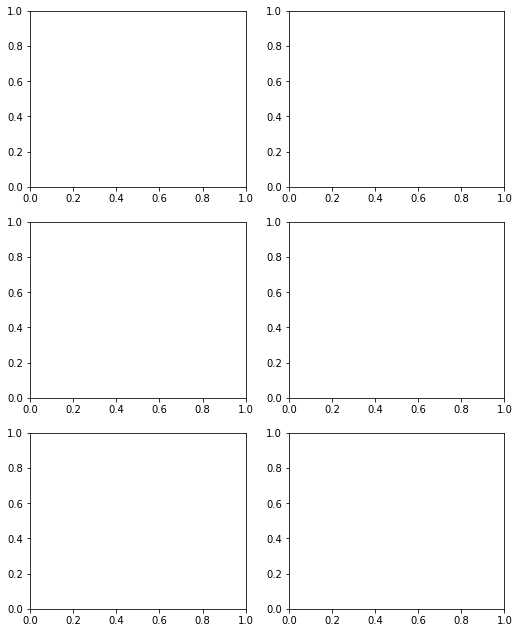

In [88]:
f, axs = plt.subplots(3,2, figsize=(8.5, 11));

In [89]:
axs

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017962A91240>,
      dtype=object)

In [90]:
sns.lineplot(x='size', y='time', hue='approach', data=res_df, ax=axs[0,0])

In [91]:
plt.show()

In [92]:
sns.lineplot(x='size', y='epochs', hue='approach', data=res_df, ax=axs[1,0])

In [93]:
sns.lineplot(x='size', y='time/epoch', hue='approach', data=res_df, ax=axs[2,0])

In [94]:
sns.lineplot(x='size', y='time_n', hue='approach', data=res_df, ax=axs[0,1])

In [95]:
sns.lineplot(x='size', y='epochs_n', hue='approach', data=res_df, ax=axs[1,1])

In [96]:
sns.lineplot(x='size', y='time/epoch_n', hue='approach', data=res_df, ax=axs[2,1])

In [97]:
f.savefig('Value_Policy_Baseline')

In [106]:
dumb_df = pd.DataFrame({'x': list(range(0,17))})

In [107]:
dumb_df['y'] = dumb_df['x']**3

In [108]:
dumb_df

,x,y
0,0,0
1,1,1
2,2,8
3,3,27
4,4,64
5,5,125
6,6,216
7,7,343
8,8,512
9,9,729


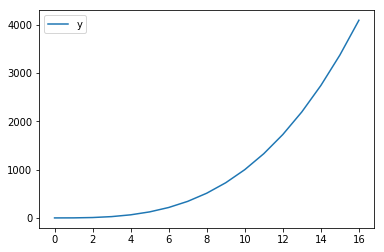

In [109]:
sns.lineplot(data=dumb_df)